In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager
rc('font', family='NanumSquareR')

# 아파트 실거래가 예측 #

In [2]:
train = pd.read_csv('./apt train.csv')

In [3]:
test = pd.read_csv('./apt test.csv')

In [4]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
transaction_id            1216553 non-null int64
apartment_id              1216553 non-null int64
city                      1216553 non-null object
dong                      1216553 non-null object
jibun                     1216553 non-null object
apt                       1216553 non-null object
addr_kr                   1216553 non-null object
exclusive_use_area        1216553 non-null float64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
transaction_date          1216553 non-null object
floor                     1216553 non-null int64
transaction_real_price    1216553 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ MB


In [6]:
train['dong'].unique()

array(['신교동', '필운동', '내수동', '인의동', '이화동', '명륜1가', '명륜2가', '창신동', '숭인동',
       '평창동', '무악동', '누상동', '수송동', '익선동', '동숭동', '부암동', '낙원동', '교북동',
       '행촌동', '신영동', '신문로1가', '청운동', '견지동', '사직동', '혜화동', '통인동', '명륜3가',
       '당주동', '구기동', '연건동', '충신동', '옥인동', '장충동2가', '신당동', '순화동', '중림동',
       '만리동1가', '회현동1가', '산림동', '남산동2가', '인현동2가', '묵정동', '흥인동', '충무로4가',
       '을지로5가', '황학동', '장충동1가', '정동', '필동3가', '만리동2가', '예장동', '필동1가',
       '남대문로5가', '회현동2가', '남창동', '오장동', '충무로5가', '후암동', '신창동', '산천동',
       '원효로4가', '효창동', '도원동', '문배동', '한강로2가', '한강로3가', '이촌동', '이태원동',
       '한남동', '서빙고동', '보광동', '동자동', '청파동1가', '용문동', '한강로1가', '청파동3가',
       '동빙고동', '원효로1가', '원효로2가', '청암동', '용산동2가', '용산동5가', '갈월동', '원효로3가',
       '주성동', '신계동', '하왕십리동', '홍익동', '마장동', '사근동', '행당동', '응봉동', '금호동1가',
       '금호동3가', '금호동4가', '옥수동', '성수동1가', '성수동2가', '용답동', '도선동', '송정동',
       '금호동2가', '상왕십리동', '중곡동', '구의동', '광장동', '자양동', '화양동', '군자동', '능동',
       '용두동', '제기동', '전농동', '답십리동', '장안동', '청량리동', '회기동', '휘경동', '이문

In [7]:
train['apartment_id']

0           7622
1           5399
2           3578
3          10957
4          10639
           ...  
1216548     9578
1216549     9578
1216550     9578
1216551     9586
1216552     9578
Name: apartment_id, Length: 1216553, dtype: int64

findfont: Font family ['NanumSquareR'] not found. Falling back to DejaVu Sans.


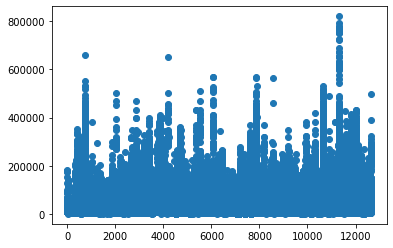

In [8]:
plt.scatter(train['apartment_id'], train['transaction_real_price'])

In [9]:
train['city']= pd.get_dummies(train['city'])
#서울 0 부산 1

In [10]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,0,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,0,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,0,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,0,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,0,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [11]:
test['city']= pd.get_dummies(test['city'])

In [12]:
train['transaction_date'].unique()

array(['21~31', '1~10', '11~20', '21~29', '21~30', '21~28'], dtype=object)

In [13]:
train.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

In [14]:
b=pd.get_dummies(train['transaction_date'])

### 거래날짜를 구간화

#### 다변량 범주들을 맵핑하는법 ####

In [15]:
train['transaction_date'].unique()

array(['21~31', '1~10', '11~20', '21~29', '21~30', '21~28'], dtype=object)

In [16]:
name_mapping = {'1~10': '1',"11~20" : '2', '21~28' :'3','21~29' : '3', '21~30' : '3', '21~31' : '3'}

In [17]:
name_mapping

{'1~10': '1',
 '11~20': '2',
 '21~28': '3',
 '21~29': '3',
 '21~30': '3',
 '21~31': '3'}

In [18]:
transaction_date1 = lambda x: name_mapping.get(x,x)

In [19]:
test.columns

Index(['transaction_id', 'apartment_id', 'city', 'dong', 'jibun', 'apt',
       'addr_kr', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor'],
      dtype='object')

In [20]:
test['transaction_date1']=test.transaction_date.map(transaction_date1)

In [21]:
train['transaction_date1']=train.transaction_date.map(transaction_date1)

In [22]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_date1
0,0,7622,0,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,3
1,1,5399,0,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,1
2,2,3578,0,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,1
3,3,10957,0,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2
4,4,10639,0,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,3


In [23]:
test.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_date1
0,1145756,10453,0,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2,2
1,1198704,989,1,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2,3
2,1222384,8597,1,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2,2
3,1179897,11086,0,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10,1
4,1223091,2121,1,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21,2


In [24]:
train=train.drop('transaction_date',axis=1)

In [25]:
test=test.drop('transaction_date',axis=1)

In [26]:
train['exclusive_use_area']=train['exclusive_use_area'].round()

In [27]:
test['exclusive_use_area']=test['exclusive_use_area'].round()

In [28]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,transaction_date1
0,0,7622,0,신교동,6-13,신현(101동),신교동 6-13 신현(101동),85.0,2002,200801,2,37500,3
1,1,5399,0,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.0,1973,200801,6,20000,1
2,2,3578,0,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,85.0,2007,200801,6,38500,1
3,3,10957,0,내수동,95,파크팰리스,내수동 95 파크팰리스,146.0,2003,200801,15,118000,2
4,4,10639,0,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.0,2004,200801,3,120000,3


In [29]:
train['floor'].unique()

array([ 2,  6, 15,  3, 16,  7,  1,  5,  4, 12,  8, 14, 11, 13, 21, 18, 20,
        9, 10, 17, 23, 19, 28, 22, 25, 29, 30, 26, -1, 27, 24, 32, 33, 31,
       35, 37, 34, 36, 38, 39, 42, 40, 56, 47, 53, -2, 41, 46, 54, 45, 44,
       43, 48, 50, 51, 49, 57, 52, -3, -4, 60, 67, 63, 65, 64, 59, 68, 66,
       58, 62, 55, 69, 61, 70, 75, 76, 74, 73, 79, 72, 80, 78, 77, 71])

### 층을 구간화 

In [30]:
train.loc[train.floor<0]=0
#지하에 있는것들을 전부 0으로 변경 

In [31]:
test.loc[test.floor<0]=0

In [32]:
train['floor'].unique()

array([ 2,  6, 15,  3, 16,  7,  1,  5,  4, 12,  8, 14, 11, 13, 21, 18, 20,
        9, 10, 17, 23, 19, 28, 22, 25, 29, 30, 26,  0, 27, 24, 32, 33, 31,
       35, 37, 34, 36, 38, 39, 42, 40, 56, 47, 53, 41, 46, 54, 45, 44, 43,
       48, 50, 51, 49, 57, 52, 60, 67, 63, 65, 64, 59, 68, 66, 58, 62, 55,
       69, 61, 70, 75, 76, 74, 73, 79, 72, 80, 78, 77, 71])

In [33]:
test['floor'].unique()

array([ 2, 10, 21,  3, 13,  9,  4, 15, 11, 17,  6,  7,  8,  1, 12,  5, 14,
       18, 16, 19, 34, 20, 31, 22, 39, 30, 27, 25, 23, 26, 24, 28, 40, 36,
       32, 29, 49, 33, 38, 43,  0, 46, 35, 55, 47])

In [34]:
b=train['floor']

In [35]:
f=test['floor']

In [36]:
bins=[-1, 11, 21, 31, 41, 51, 61, 71, 81]
labels=['1','2','3','4','5','6','7','8']
a=pd.cut(b,bins,labels=labels)
a
#-1~11까지가 1 

0          1
1          1
2          1
3          2
4          1
          ..
1216548    1
1216549    1
1216550    1
1216551    1
1216552    2
Name: floor, Length: 1216553, dtype: category
Categories (8, object): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

In [37]:
bins=[-1, 11, 21, 31, 41, 51, 61, 71, 81]
labels=['1','2','3','4','5','6','7','8']
e=pd.cut(f,bins,labels=labels)
e

0       1
1       1
2       1
3       1
4       2
       ..
5458    1
5459    1
5460    3
5461    1
5462    1
Name: floor, Length: 5463, dtype: category
Categories (8, object): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

In [38]:
a.unique()

[1, 2, 3, 4, 5, 6, 7, 8]
Categories (8, object): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

In [39]:
e.unique()

[1, 2, 4, 3, 5, 6]
Categories (6, object): [1 < 2 < 3 < 4 < 5 < 6]

In [40]:
train=train.drop('floor',axis=1)

In [41]:
test=test.drop('floor',axis=1)

In [42]:
train['floor'] = a

In [43]:
test['floor']= e

In [44]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_real_price,transaction_date1,floor
0,0,7622,0,신교동,6-13,신현(101동),신교동 6-13 신현(101동),85.0,2002,200801,37500,3,1
1,1,5399,0,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.0,1973,200801,20000,1,1
2,2,3578,0,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,85.0,2007,200801,38500,1,1
3,3,10957,0,내수동,95,파크팰리스,내수동 95 파크팰리스,146.0,2003,200801,118000,2,2
4,4,10639,0,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.0,2004,200801,120000,3,1


### 거래발생시기를 년도로 구간화

In [45]:
train['transaction_year_month'].unique()

array([200801, 200802, 200803, 200804, 200805, 200806, 200807, 200808,
       200809, 200810, 200811, 200812, 200901, 200902, 200903, 200904,
       200905, 200906, 200907, 200908, 200909, 200910, 200911, 200912,
       201001, 201002, 201003, 201004, 201005, 201006, 201007, 201008,
       201009, 201010, 201011, 201012, 201101, 201102, 201103, 201104,
       201105, 201106, 201107, 201108, 201109,      0, 201110, 201111,
       201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207,
       201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303,
       201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311,
       201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407,
       201408, 201409, 201410, 201411, 201412, 201501, 201502, 201503,
       201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511,
       201512, 201601, 201602, 201603, 201604, 201605, 201606, 201607,
       201608, 201609, 201610, 201611, 201612, 201701, 201702, 201703,
      

In [46]:
test['transaction_year_month'].unique()

array([201711, 201708, 201710, 201707, 201712, 201706, 201702, 201704,
       201705, 201703, 201701, 201709,      0])

In [47]:
sum(train['transaction_year_month']==0)

168

In [48]:
sum(test['transaction_year_month']==0)

2

In [49]:
bins=[-1,200800, 200901, 201001, 201101, 201201, 201301, 201401, 201501, 201601,201701,201801]
labels=['0','08','09','10','11','12','13','14','15','16','17']
b=pd.cut(train['transaction_year_month'],bins,labels=labels)
b
#-1~11까지가 1 
#transaction_year_month 컬럼에서 0이라는 데이터가 존재하는데 이것들은 전부 0으로 

0          08
1          08
2          08
3          08
4          08
           ..
1216548    17
1216549    17
1216550    17
1216551    17
1216552    17
Name: transaction_year_month, Length: 1216553, dtype: category
Categories (11, object): [0 < 08 < 09 < 10 ... 14 < 15 < 16 < 17]

In [50]:
bins=[-1,200800, 200901, 201001, 201101, 201201, 201301, 201401, 201501, 201601,201701,201801]
labels=['0','08','09','10','11','12','13','14','15','16','17']
g=pd.cut(test['transaction_year_month'],bins,labels=labels)
g

0       17
1       17
2       17
3       17
4       17
        ..
5458    17
5459    17
5460    17
5461    17
5462    17
Name: transaction_year_month, Length: 5463, dtype: category
Categories (11, object): [0 < 08 < 09 < 10 ... 14 < 15 < 16 < 17]

In [51]:
g.isnull().sum()

0

In [52]:
b.isnull().sum()

0

In [53]:
train['transaction_year_month']=b

In [54]:
test['transaction_year_month']=b

In [55]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_real_price,transaction_date1,floor
0,0,7622,0,신교동,6-13,신현(101동),신교동 6-13 신현(101동),85.0,2002,08,37500,3,1
1,1,5399,0,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.0,1973,08,20000,1,1
2,2,3578,0,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,85.0,2007,08,38500,1,1
3,3,10957,0,내수동,95,파크팰리스,내수동 95 파크팰리스,146.0,2003,08,118000,2,2
4,4,10639,0,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.0,2004,08,120000,3,1


In [56]:
test.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date1,floor
0,1145756,10453,0,목동,938,청학,목동 938 청학,36.0,2002,08,2,1
1,1198704,989,1,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,69.0,1977,08,3,1
2,1222384,8597,1,괴정동,447-13,우림그린,괴정동 447-13 우림그린,73.0,1989,08,2,1
3,1179897,11086,0,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),112.0,2004,08,1,1
4,1223091,2121,1,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,120.0,2014,08,2,2


In [57]:
train.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_real_price    0
transaction_date1         0
floor                     0
dtype: int64

In [58]:
train['year_of_completion']

0          2002
1          1973
2          2007
3          2003
4          2004
           ... 
1216548    2012
1216549    2012
1216550    2012
1216551    2008
1216552    2012
Name: year_of_completion, Length: 1216553, dtype: int64

### 동, 지번, 아파트이름, 아파트 주소와 같은 문자열들은 범주화를 할 수 없을정도로 넓게 펴져있어서 삭제 
#### 다음번에는 다 넣어보고 한번 해보기 \

In [59]:
train=train.drop('dong', axis=1)
train=train.drop('apartment_id', axis=1)
train=train.drop('jibun', axis=1)
train=train.drop('apt', axis=1)
train=train.drop('addr_kr', axis=1)

In [60]:
train=train.drop('transaction_id', axis=1)

In [61]:
test=test.drop('dong', axis=1)
test=test.drop('apartment_id', axis=1)
test=test.drop('jibun', axis=1)
test=test.drop('apt', axis=1)
test=test.drop('addr_kr', axis=1)

In [62]:
test=test.drop('transaction_id', axis=1)

In [63]:
train.head()

,city,exclusive_use_area,year_of_completion,transaction_year_month,transaction_real_price,transaction_date1,floor
0,0,85.0,2002,08,37500,3,1
1,0,99.0,1973,08,20000,1,1
2,0,85.0,2007,08,38500,1,1
3,0,146.0,2003,08,118000,2,2
4,0,194.0,2004,08,120000,3,1


In [64]:
test.head()

,city,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date1,floor
0,0,36.0,2002,08,2,1
1,1,69.0,1977,08,3,1
2,1,73.0,1989,08,2,1
3,0,112.0,2004,08,1,1
4,1,120.0,2014,08,2,2


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 7 columns):
city                      1216553 non-null int64
exclusive_use_area        1216553 non-null float64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null category
transaction_real_price    1216553 non-null int64
transaction_date1         1216553 non-null object
floor                     1216553 non-null category
dtypes: category(2), float64(1), int64(3), object(1)
memory usage: 48.7+ MB


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 6 columns):
city                      5463 non-null int64
exclusive_use_area        5463 non-null float64
year_of_completion        5463 non-null int64
transaction_year_month    5463 non-null category
transaction_date1         5463 non-null object
floor                     5463 non-null category
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 182.3+ KB


In [67]:
train['exclusive_use_area']=train['exclusive_use_area'].astype(int)
train['transaction_year_month']=train['transaction_year_month'].astype(int)
train['floor']=train['floor'].astype(int)

In [68]:
test['exclusive_use_area']=test['exclusive_use_area'].astype(int)
test['transaction_date1']=test['transaction_date1'].astype(int)
test['floor']=test['floor'].astype(int)
test['city']=test['city'].astype(int)

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 7 columns):
city                      1216553 non-null int64
exclusive_use_area        1216553 non-null int64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
transaction_real_price    1216553 non-null int64
transaction_date1         1216553 non-null object
floor                     1216553 non-null int64
dtypes: int64(6), object(1)
memory usage: 65.0+ MB


In [70]:
train['transaction_date1']=train['transaction_date1'].astype(int)

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 7 columns):
city                      1216553 non-null int64
exclusive_use_area        1216553 non-null int64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
transaction_real_price    1216553 non-null int64
transaction_date1         1216553 non-null int64
floor                     1216553 non-null int64
dtypes: int64(7)
memory usage: 65.0 MB


In [72]:
test.info()
# transaction_real_price가 빠져 있으므로 transaction_real_price를 0으로 대체 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 6 columns):
city                      5463 non-null int64
exclusive_use_area        5463 non-null int64
year_of_completion        5463 non-null int64
transaction_year_month    5463 non-null category
transaction_date1         5463 non-null int64
floor                     5463 non-null int64
dtypes: category(1), int64(5)
memory usage: 219.3 KB


In [73]:
#test['transaction_real_price']=0

In [74]:
test

,city,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date1,floor
0,0,36,2002,08,2,1
1,1,69,1977,08,3,1
2,1,73,1989,08,2,1
3,0,112,2004,08,1,1
4,1,120,2014,08,2,2
...,...,...,...,...,...,...
5458,0,84,2003,08,2,1
5459,0,85,2009,08,1,1
5460,0,110,2004,08,3,3
5461,0,92,2005,08,3,1


### Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
train.columns

Index(['city', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_real_price', 'transaction_date1',
       'floor'],
      dtype='object')

In [76]:
Y=train['transaction_real_price']
x=train[['city', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month','transaction_date1',
       'floor']]

## ==================

In [79]:
rf=RandomForestRegressor(n_estimators=500)

In [95]:
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [132]:
train=train
test=test
y_train=train['transaction_real_price']
X_train=train[['city', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month','transaction_date1',
       'floor']]

y_test=test['transaction_real_price']
X_test=test[['city', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month','transaction_date1',
       'floor']]

In [134]:
rf=RandomForestRegressor(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [135]:
pred=rf.predict(X_test)
real=test['transaction_real_price']

In [136]:
from sklearn.metrics import mean_squared_error
mean_squared_error(real,pred)**0.5

50792.33614060205

## =========================

### 아마도 test에 real price를 0으로 둬서 이렇게 된거같다 
#### 그냥 train셋을 70:30으로 나누어서 진행 

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size = 0.3, random_state=10)

In [80]:
rf=RandomForestRegressor(n_estimators=500)

In [81]:
rf.fit(x_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [82]:
pred=rf.predict(x_test)
real=test['transaction_real_price']

KeyError: 'transaction_real_price'

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(real,pred)**0.5